In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2 #@param ["mobilenet_v2", "inception_v3"] {type:"raw"}

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

24576/10484 [======================================================================] - 0s 0us/step


In [ ]:
# data_root = tf.keras.utils.get_file(
#     'Venomous',
#     'https://github.com/arjun921/Indian-Snakes-Dataset/tree/master/Venomous',
#     untar=True,
#     extract=True,
#     archive_format='auto')

In [ ]:
# data_root

In [ ]:

# batch_size = 32
# img_height = 224
# img_width = 224

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   str(data_root),
#   labels = 'inferred',
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

# val_ds = tf.keras.utils.image_dataset_from_directory(
#   str(data_root),
#   labels = 'inferred',
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/SnakeTeam_SamsungAI/Venomous.zip (Unzipped Files)/Venomous',
    labels =  'inferred',
    label_mode = "int",    #int ou string
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.1,
    subset = "training",
)



ds_val= tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/SnakeTeam_SamsungAI/Venomous.zip (Unzipped Files)/Venomous',
    labels =  'inferred',
    label_mode = "int",    #int ou string
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.1,
    subset = "validation",
)



Found 1151 files belonging to 6 classes.
Using 1036 files for training.
Found 1151 files belonging to 6 classes.
Using 115 files for validation.


In [ ]:
class_names = np.array(ds_train.class_names)
print(class_names)

['Common Krait' 'King Cobra' 'Monocled Cobra' "Russell's Viper"
 'Saw-scaled Viper' 'Spectacled Cobra']


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
ds_train = ds_train.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
ds_val = ds_val.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
ds_train = ds_train.cache().prefetch(buffer_size=AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


### Run the classifier on a batch of images

In [ ]:
%%time
result_batch = classifier.predict(ds_train)

CPU times: user 42.2 s, sys: 2.7 s, total: 44.9 s
Wall time: 2min 21s


In [ ]:
predicted_class_names = imagenet_labels[tf.math.argmax(result_batch, axis=-1)]
predicted_class_names

array(['hognose snake', 'Indian cobra', 'horned viper', ...,
       'hognose snake', 'sidewinder', 'Indian cobra'], dtype='<U30')

Check how these predictions line up with the images:

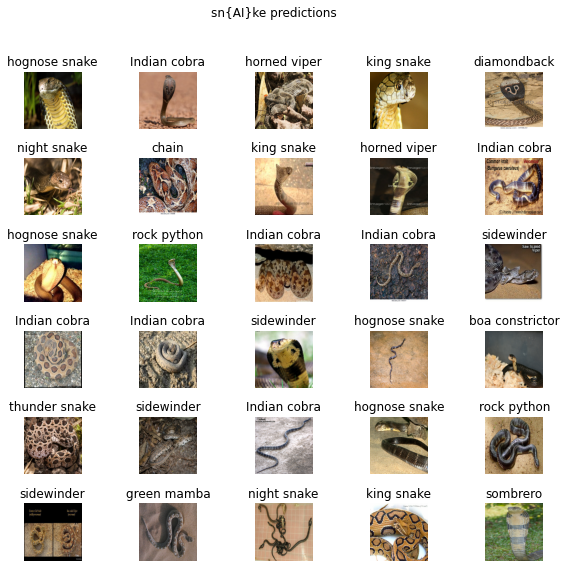

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("sn{AI}ke predictions")

In [ ]:
# model = keras.Sequential([ 
#      layers.Input((28, 28, 1)),
#      layers.Conv2D(16, 3, padding='same'),
#      layers.Conv2D(32, 3, padding='same'),
#      layers.MaxPooling2D(),
#      layers.Flatten(),
#      layers.Dense(10),
# ])

In [ ]:
# def augment(x, y):
#   image = tf.image.random_brightness(x, max_delta = 0.05)
#   return image, y

# ds_train = ds_train.map(augment)


# for epochs in range(10):
#   for x, y in ds_train:
#     # train here

In [ ]:
# model.compile(
#     optimizer = keras.optimizers.Adam(),
#     loss = [
#             keras.losses.SparseCategoricalCrossentropy(from_logits = True),
#     ],
#     metrics = ["accuracy"],
# )

In [ ]:
# model.fit(ds_train, epochs = 10, verbose = 2)